In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
PL_dataframe = pd.read_csv("../Data/Raw/PremierLeague.csv")
columns_to_keep = ['MatchID', 'Season', 'MatchWeek', 'Date', 'HomeTeam', 'AwayTeam',
                   'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals']
PL_dataframe = PL_dataframe[columns_to_keep]
print(PL_dataframe.shape)
PL_dataframe['Date'] = pd.to_datetime(PL_dataframe['Date'])
PL_dataframe = PL_dataframe.sort_values('Date')
PL_dataframe.head()

(12160, 8)


,MatchID,Season,MatchWeek,Date,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,Arsenal,Coventry,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,Aston Villa,QPR,4,1
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,Chelsea,Blackburn,1,2
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,Liverpool,Sheffield Weds,2,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,Man City,Leeds,1,1


In [4]:
elo_ratings_history_df = pd.read_csv('../Data/Processed/Elo-Ratings History.csv')
elo_ratings_history_df['Date'] = pd.to_datetime(elo_ratings_history_df['Date'])
elo_ratings_history_df.head()

,Season,MatchWeek,Date,Team,Full Time Goals,Elo-rating before match,Elo-rating after match
0,1993-1994,1,1993-08-14,Arsenal,0,1500.0,1485.0
1,1993-1994,1,1993-08-14,Coventry,3,1500.0,1515.0
2,1993-1994,1,1993-08-14,Aston Villa,4,1500.0,1515.0
3,1993-1994,1,1993-08-14,QPR,1,1500.0,1485.0
4,1993-1994,1,1993-08-14,Chelsea,1,1500.0,1485.0


In [5]:
man_united_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'] == 'Man United']
print(man_united_elo_history['Date'].is_monotonic_increasing)
man_united_elo_history.head()
man_united_elo_history

True


,Season,MatchWeek,Date,Team,Full Time Goals,Elo-rating before match,Elo-rating after match
21,1993-1994,1,1993-08-15,Man United,2,1500.00,1515.00
36,1993-1994,1,1993-08-18,Man United,3,1515.00,1530.00
52,1993-1994,2,1993-08-21,Man United,1,1530.00,1527.49
67,1993-1994,2,1993-08-23,Man United,2,1527.49,1541.89
95,1993-1994,3,1993-08-28,Man United,3,1541.89,1553.89
...,...,...,...,...,...,...,...
24235,2024-2025,34,2025-04-27,Man United,1,1567.33,1568.80
24255,2024-2025,35,2025-05-04,Man United,3,1568.80,1556.23
24276,2024-2025,36,2025-05-11,Man United,0,1556.23,1540.02
24283,2024-2025,37,2025-05-16,Man United,0,1540.02,1531.07


In [6]:
arsenal_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'] == 'Arsenal']
print(arsenal_elo_history['Date'].is_monotonic_increasing)
arsenal_elo_history.head()

True


,Season,MatchWeek,Date,Team,Full Time Goals,Elo-rating before match,Elo-rating after match
0,1993-1994,1,1993-08-14,Arsenal,0,1500.00,1485.00
23,1993-1994,1,1993-08-16,Arsenal,1,1485.00,1501.29
49,1993-1994,2,1993-08-21,Arsenal,1,1501.29,1515.64
68,1993-1994,2,1993-08-24,Arsenal,2,1515.64,1529.92
98,1993-1994,3,1993-08-28,Arsenal,2,1529.92,1544.71


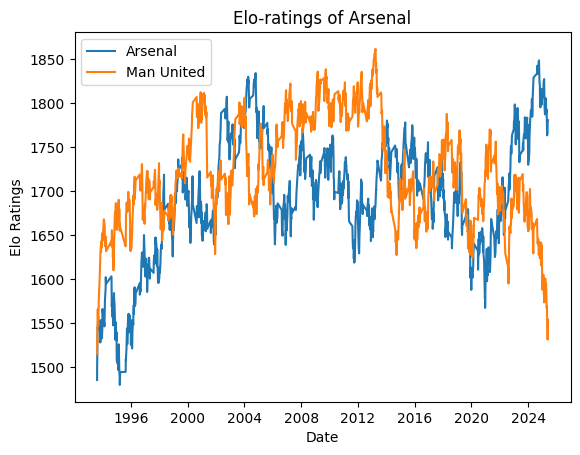

In [7]:
plt.plot(arsenal_elo_history['Date'], arsenal_elo_history['Elo-rating after match'], label = 'Arsenal')
plt.plot(man_united_elo_history['Date'], man_united_elo_history['Elo-rating after match'], label = 'Man United')
plt.title('Elo-ratings of Arsenal')
plt.xlabel('Date')
plt.ylabel('Elo Ratings')
plt.legend()
plt.show()

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = arsenal_elo_history['Date'],
    y = arsenal_elo_history['Elo-rating after match'],
    mode = 'lines',
    name = 'Arsenal',
    line = dict(color = 'red')
))

fig.add_trace(go.Scatter(
    x = man_united_elo_history['Date'],
    y = man_united_elo_history['Elo-rating after match'],
    mode = 'lines',
    name = 'Man United',
    line = dict(color = 'black')
))

fig.update_layout(
    title = 'Elo-Ratings',
    xaxis_title = 'Date',
    yaxis_title = 'Elo Ratings'
)

fig.show()

In [9]:
def plotly_chart_maker(*teams):

    fig = go.Figure()
    colors = ['red', 'blue', 'green', 'black', 'orange', 'purple', 'brown']
    
    for idx, team in enumerate(teams):
        teams_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'] == team]
        color = colors[idx% len(colors)]
        
        fig.add_trace(go.Scatter(
        x = teams_elo_history['Date'],
        y = teams_elo_history['Elo-rating after match'],
        mode = 'lines',
        name = team,
        line = dict(color = color)
))
    fig.show()

In [10]:
plotly_chart_maker('Arsenal', 'Chelsea', 'Man City')

In [11]:
def plotly_express_chart_maker(*teams):
    if len(teams) >=5:
        return "Too many teams to visulize clearly. Try 4 teams or fewer"
        

    teams_elo_history = elo_ratings_history_df.loc[elo_ratings_history_df['Team'].isin(teams)]
    fig = px.line(
        teams_elo_history,
        x = 'Date',
        y = 'Elo-rating after match',
        color = 'Team',
        title = f'Elo Rating History of {', '.join(teams)}'
        )
    fig.show()

In [12]:
plotly_express_chart_maker('Chelsea', 'Liverpool','Man United', 'Southampton')

In [13]:
def highest_elo_rating_achieved():
    max_team_rating_index = elo_ratings_history_df.groupby('Team')['Elo-rating after match'].idxmax()
    max_team_rating_df = elo_ratings_history_df.loc[max_team_rating_index]
    max_team_rating_df['Date'] = max_team_rating_df['Date'].dt.date
    max_team_rating_df_sorted = max_team_rating_df.sort_values(by = 'Elo-rating after match', ascending = False)
    return max_team_rating_df_sorted[['Season', 'Date', 'Team', 'Elo-rating after match']]

max_team_rating_df = highest_elo_rating_achieved()
max_team_rating_df.head()

,Season,Date,Team,Elo-rating after match
20298,2019-2020,2020-02-24,Liverpool,1958.06
19763,2019-2020,2019-08-10,Man City,1908.84
9547,2005-2006,2006-01-15,Chelsea,1875.96
15041,2012-2013,2013-03-30,Man United,1861.53
23684,2024-2025,2024-10-05,Arsenal,1848.48


In [14]:
def plotly_bar_chart_max_rating(*teams):
    if len(teams) > 7:
        return "Too long list for bar chart"
    
    required_df = max_team_rating_df.loc[max_team_rating_df['Team'].isin(teams)]
    required_df.sort_values(by = 'Elo-rating after match', ascending = False)
    
    fig = px.bar(
       required_df,
       x = "Team",
       y = 'Elo-rating after match',
       title = f'Highest Elo-Ratings ever achieved for,{', '.join(teams)} ',
       color = 'Team',
       hover_data = ['Date','Season'],
       text = 'Elo-rating after match'
)
    fig.update_yaxes(range = [required_df['Elo-rating after match'].min() - 100, required_df['Elo-rating after match'].max() + 20 ])
    fig.show()

In [15]:
plotly_bar_chart_max_rating('Liverpool', 'Chelsea', 'Arsenal', 'Man United', 'Man City', 'Tottenham', 'Southampton')

In [16]:
unique_teams = elo_ratings_history_df['Team'].unique()
unique_teams

array(['Arsenal', 'Coventry', 'Aston Villa', 'QPR', 'Chelsea',
       'Blackburn', 'Liverpool', 'Sheffield Weds', 'Man City', 'Leeds',
       'Newcastle', 'Tottenham', 'Oldham', 'Ipswich', 'Sheffield United',
       'Swindon', 'Southampton', 'Everton', 'West Ham', 'Wimbledon',
       'Norwich', 'Man United', 'Crystal Palace', "Nott'm Forest",
       'Leicester', 'Bolton', 'Middlesbrough', 'Derby', 'Sunderland',
       'Barnsley', 'Charlton', 'Bradford', 'Watford', 'Fulham',
       'West Brom', 'Birmingham', 'Wolves', 'Portsmouth', 'Wigan',
       'Reading', 'Hull', 'Stoke', 'Burnley', 'Blackpool', 'Swansea',
       'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield', 'Brentford',
       'Luton'], dtype=object)

In [17]:
elo_ratings_improvements = []
for team in unique_teams:
    team_data_df = elo_ratings_history_df.loc[elo_ratings_history_df['Team'] == team]
    unique_seasons = team_data_df['Season'].unique()

    for season in unique_seasons:
        team_data_season_df = team_data_df.loc[team_data_df['Season'] == season].sort_values(by = 'Date')
        season_start_elo = team_data_season_df.iloc[0]['Elo-rating before match']
        season_end_elo = team_data_season_df.iloc[-1]['Elo-rating after match']

        elo_difference_season = season_end_elo - season_start_elo

        elo_ratings_improvements.append({
            'Season': season,
            'Team': team,
            'Season Start Elo': season_start_elo,
            'Season End Elo': season_end_elo,
            'Elo-difference': round(elo_difference_season, 2)
        })



In [18]:
elo_ratings_improvements_df = pd.DataFrame(elo_ratings_improvements)
elo_gain_per_team = elo_ratings_improvements_df.loc[elo_ratings_improvements_df.groupby('Team')['Elo-difference'].idxmax()].sort_values(by = 'Elo-difference',ascending = False)
elo_loss_per_team = elo_ratings_improvements_df.loc[elo_ratings_improvements_df.groupby('Team')['Elo-difference'].idxmin()].sort_values(by = 'Elo-difference',ascending = True)
elo_gain_per_team.to_csv('../Data/Processed/Elo_gain_per_team.csv', index = False)
elo_gain_per_team.head()
elo_loss_per_team.to_csv('../Data/Processed/Elo_loss_per_team.csv', index = False)

In [19]:
def plotly_bar_chart_elo_gain(*teams):
    
    required_df = elo_gain_per_team.loc[elo_gain_per_team['Team'].isin(teams)].sort_values(by = 'Elo-difference', ascending = False)
    fig = px.bar(
        required_df,
        x = 'Team',
        y = 'Elo-difference',
        title = f'Best Elo-gain for {', '.join(teams)}',
        color = 'Team',
        hover_data = ['Season', 'Season Start Elo', 'Season End Elo'],
        text = 'Elo-difference'
        )

    fig.show()

In [20]:
plotly_bar_chart_elo_gain('Chelsea', 'Ipswich', 'Wolves', 'Arsenal', 'Leeds', 'Leicester')

In [21]:
def plotly_bar_chart_elo_loss(*teams):
    
    required_df = elo_loss_per_team.loc[elo_loss_per_team['Team'].isin(teams)].sort_values(by = 'Elo-difference', ascending = True)
    fig = px.bar(
        required_df,
        x = 'Team',
        y = 'Elo-difference',
        title = f'Highest Elo-loss for {', '.join(teams)}',
        color = 'Team',
        hover_data = ['Season', 'Season Start Elo', 'Season End Elo'],
        text = 'Elo-difference'
        )

    fig.show()

In [22]:
plotly_bar_chart_elo_loss('Chelsea', 'Ipswich', 'Sunderland', 'Arsenal', 'Leeds', 'Leicester')

In [23]:
def plotly_line_chart_matchBYmatch(*teams, season):
    if len(teams) >6:
        return "Too many teams"
    
    required_df = elo_ratings_history_df.loc[
        (elo_ratings_history_df['Team'].isin(teams)) & (elo_ratings_history_df['Season'] == season)].sort_values( by = 'Date')

    fig = px.line(
        required_df,
        x = 'Date',
        y = 'Elo-rating after match',
        title = f'Elo-Ratings of {', '.join(teams)} across the {season} season',
        color = 'Team',
        hover_data = ['Date', 'Elo-rating before match']
    )
    fig.show()

In [24]:
plotly_line_chart_matchBYmatch('Chelsea','Liverpool', 'Man City', 'Tottenham', 'Man United', season = '2019-2020')

In [ ]:
def elo_difference_across_seasons(*teams, season):
    required_df = elo_ratings_history_df.loc[
        (elo_ratings_history_df['Team'].isin(teams)) & (elo_ratings_history_df['Season'].isin(season))].sort_values( by = 'Date')
    required_df.drop('Full Time Goals', axis =1, inplace = True)
    
    start_rating = required_df.groupby("Team")["Elo-rating before match"].first()
    end_rating = required_df.groupby("Team")['Elo-rating after match'].last()

    elo_difference_df = pd.DataFrame({
        "Start Elo" : start_rating,
        "End Elo" : end_rating
    })
    elo_difference_df['Elo Difference'] = round(elo_difference_df['End Elo'] - elo_difference_df['Start Elo'], 1)
    elo_difference_df['Color'] = elo_difference_df['Elo Difference'].apply(lambda x : 'green' if x >=0  else 'red')
    elo_difference_df['Size'] = elo_difference_df['Elo Difference'].abs()*10
    elo_difference_df['hover_text'] = elo_difference_df.index + "<br> Elo Difference: " + elo_difference_df['Elo Difference'].astype(str)
    
    fig = px.scatter(
        elo_difference_df,
        x = elo_difference_df.index,
        y = 'Elo Difference',
        size = 'Size',
        color = 'Color',
        text = 'hover_text',
        title = f"Elo Rating Changes Across {len(season)} Seasons for {', '.join(elo_difference_df.index)}",
        color_discrete_map={'green':'green','red':'red'},
        size_max = 100

    )
    fig.update_layout(showlegend = False)
    fig.update_xaxes(title = "")
    fig.update_yaxes(visible = False)

    fig.show()
    
elo_difference_across_seasons("Chelsea","Arsenal","Tottenham", "Bolton", season = ["2000-2001", "2001-2002", "2002-2003"])

